In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, matplotlib.pyplot as plt, numpy as np, pandas as pd, networkx as nx
from io import StringIO

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

sys.path.append('../Teaching/')
import draw_NX as qnx
import signatures as s

In [3]:
overleaf_path = r'D:\joaquimg\tmp/'
qnx.SetOutputPath( overleaf_path+'generated' )
main_path = qnx._output_path

In [4]:
family = [nx.draw,nx.draw_networkx,nx.draw_networkx_edge_labels,nx.draw_networkx_edges,nx.draw_networkx_labels,nx.draw_networkx_nodes]

In [5]:
s.DisplayNamedArguments(family).to_clipboard()

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None ):
    display(s.DisplayNamedArguments(family))

,draw,draw_networkx,draw_networkx_edge_labels,draw_networkx_edges,draw_networkx_labels,draw_networkx_nodes
alpha,,,None,None,None,None
arrows,,None,,None,,
arrowsize,,,,10,,
arrowstyle,,,,None,,
ax,None,,None,None,None,None
bbox,,,None,,None,
clip_on,,,True,,True,
cmap,,,,,,None
connectionstyle,,,,'arc3',,
edge_cmap,,,,None,,


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None ):
    display(s.DisplayPositionalArguments(family))

,draw,draw_networkx,draw_networkx_edge_labels,draw_networkx_edges,draw_networkx_labels,draw_networkx_nodes
0,G,G,G,G,G,G
1,,,pos,pos,pos,pos


In [8]:
def DinaNet():
    m = (6, 8, 2, 9, 13, 1)
    c = (8, 8, 10, 4, 9)
    k = 3
    G = nx.DiGraph()
    G.add_node( 'door', layer=0 )
    for i in range(len(m)):
        G.add_node( f'f{i}', layer=1, label=f'$f_{i}$' )
    for j in range(len(c)):
        G.add_node( f't{j}', layer=2, label=f'$t_{j}$' )
    G.add_node( 'seat', layer=3 )
    for i,f in enumerate(m):
        G.add_edge( 'door', f'f{i}', capacity=f )
    for j,t in enumerate(c):
        G.add_edge( f't{j}', 'seat', capacity=t )
    for i in range(len(m)):
        for j in range(len(c)):
            G.add_edge( f'f{i}', f't{j}', capacity=k )
    return G

In [9]:
G = DinaNet()
pos = nx.multipartite_layout(G,subset_key='layer')

In [11]:
flow = nx.maximum_flow(G,'door','seat')
F = { (u,v) : flow[-1][u][v] for (u,v) in G.edges() }
f = { (u,v) : flow[-1][u][v] for (u,v) in G.edges() if flow[-1][u][v] and not u == 'door' and not v == 'seat' }

node_size = 800
all_edge_labels = nx.get_edge_attributes(G,'capacity')
edges_with_rotated_labels = { (u,v) for (u,v) in G.edges if u == 'door' or v == 'seat' }
rotated_edge_labels = { e : l for e,l in all_edge_labels.items() if e in edges_with_rotated_labels }
vertical_edge_labels = { e : l for e,l in all_edge_labels.items() if not e in edges_with_rotated_labels }
functions = [ ( nx.draw_networkx_nodes, { 'node_size' : node_size } )
             ,( nx.draw_networkx_edges, dict(width=list(F.values()), edge_color='lightblue', style='solid', alpha=None, arrowstyle='-', node_size=node_size) )
             ,( nx.draw_networkx_edges, dict( node_size=node_size, width=.2 ) )
             ,( nx.draw_networkx_edge_labels, { 'bbox' : dict(boxstyle='round4', facecolor='white', alpha=None, edgecolor='red'), 'edge_labels' : rotated_edge_labels, 'rotate' : True } )
             ,( nx.draw_networkx_edge_labels, dict( bbox=dict(boxstyle='circle', facecolor='white', alpha=None, edgecolor='orange'), edge_labels=vertical_edge_labels, rotate=False ) )
             ,( nx.draw_networkx_edge_labels, dict( edge_labels=f, rotate=True, label_pos=.85, font_size=6 ) )
             ,( nx.draw_networkx_labels, { 'font_color' : 'white', 'font_size' : 13, 'labels' : nx.get_node_attributes( G, 'label' ) } ) 
             ,( nx.draw_networkx_labels, { 'font_color' : 'yellow', 'font_size' : 10, 'labels' : { 'door' : 'door', 'seat' : 'seat' } } ) 
             ]

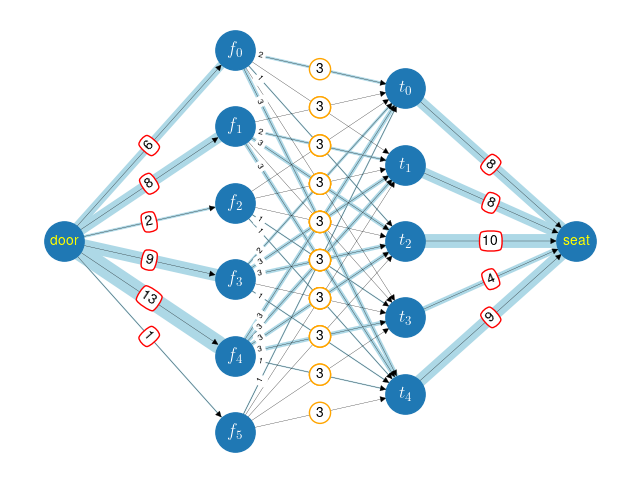

In [12]:
qnx.Draw( G, pos, functions, file_name=main_path+'test' )

In [13]:
pd.DataFrame.from_dict(flow[-1],orient='index').fillna('')

,f0,f1,f2,f3,f4,f5,t0,t1,t2,t3,t4,seat
door,6.0,8.0,2.0,9.0,13.0,1.0,,,,,,
f0,,,,,,,2.0,0.0,1.0,0.0,3.0,
f1,,,,,,,0.0,2.0,3.0,0.0,3.0,
f2,,,,,,,0.0,0.0,0.0,1.0,1.0,
f3,,,,,,,2.0,3.0,3.0,0.0,1.0,
f4,,,,,,,3.0,3.0,3.0,3.0,1.0,
f5,,,,,,,1.0,0.0,0.0,0.0,0.0,
t0,,,,,,,,,,,,8.0
t1,,,,,,,,,,,,8.0
t2,,,,,,,,,,,,10.0


In [14]:
def Fig4():
    nodes = '''
node,x,y,nudge,demand
a,0,1,'w',-1
b,1,2,'w',0
c,1,1,'sw',0
d,1,0,'w',-2
e,2,2,'e',2
f,2,1,'ne',0
g,2,0,'e',1
h,3,1,'e',0
'''

    edges = '''
from,to,cost
a,b,3
a,c,1
a,d,2
b,e,1
c,b,1
c,e,4
c,d,1
d,g,2
d,f,3
c,f,1
f,e,4
g,f,8
f,h,2
e,h,2
g,h,0
'''
    nodes = pd.read_csv(StringIO(nodes), sep=',', index_col='node').fillna(0)
    edges = pd.read_csv(StringIO(edges), sep=',', index_col=['from','to'])

    return  nodes, edges

In [15]:
G = qnx.FillGraphFromFrames( nx.DiGraph(), *Fig4() )
pos = qnx.PosFromXY(G)

In [43]:
flow = nx.min_cost_flow(G,demand='demand',capacity='capacity',weight='cost')
F = { (u,v) : flow[u][v] for (u,v) in G.edges() if flow[u][v] }
node_size = 400
nudge = nx.get_node_attributes(G,'nudge')
edge_labels_with_flow = { (u,v) : rf'${flow[u][v]}\times{l}$' for (u,v),l in nx.get_edge_attributes(G,'cost').items() if flow[u][v] }
edge_labels_without_flow = { (u,v) : rf'${l}$' for (u,v),l in nx.get_edge_attributes(G,'cost').items() if flow[u][v] == 0 }
nudged = { n : qnx.Nudge(p,nudge[n],.15) for n,p in pos.items() }
functions = [ ( nx.draw_networkx_nodes, dict( node_size=node_size ) )
             ,( nx.draw_networkx_labels, dict( font_color='white', font_size=13, labels={ n : f'${n}$' for n in G.nodes} ) ) 
             ,( nx.draw_networkx_labels, dict( pos=nudged, font_color='black', font_size=13, labels={ n : f'${d}$' for n,d in nx.get_node_attributes(G,'demand').items() } ) ) 
             ,( nx.draw_networkx_edges, dict( edgelist=F.keys(), width=10, edge_color='lightblue', style='solid', alpha=None, arrowstyle='-', node_size=node_size) )
             ,( nx.draw_networkx_edges, dict( node_size=node_size, width=2 ) )
             ,( nx.draw_networkx_edge_labels, dict(edge_labels=edge_labels_with_flow, rotate=True, bbox=dict(boxstyle='square', facecolor='white', alpha=None, edgecolor='lightblue') ) )
             ,( nx.draw_networkx_edge_labels, dict(edge_labels=edge_labels_without_flow, rotate=True ) )
             ]

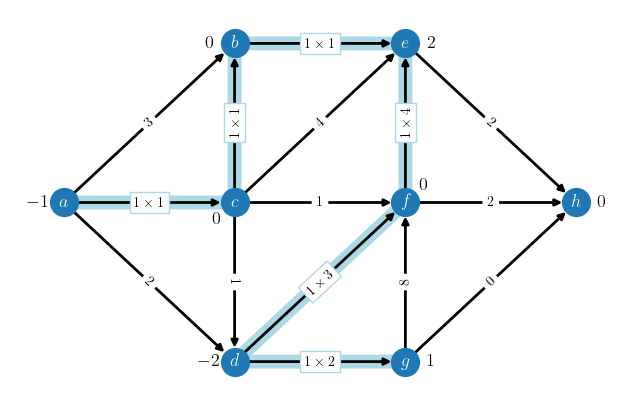

In [44]:
qnx.Draw( G, pos, functions, figsize=(8,5) )

In [66]:
def Fig5():
    nodes = '''
node,x,y,nudge,demand
a,0,1,'w',-1
b,1,2,'w',0
c,1,0,'w',0
d,2,2,'e',0
e,2,0,'e',0
f,3,1,'e',1
'''

    edges = '''
from,to,cost
a,b,4
a,c,3
b,c,4
b,d,4
b,e,3
c,d,4
c,e,5
d,f,2
e,d,4
e,f,1
'''
    nodes = pd.read_csv(StringIO(nodes), sep=',', index_col='node').fillna(0)
    edges = pd.read_csv(StringIO(edges), sep=',', index_col=['from','to'])

    return  nodes, edges

In [67]:
G = qnx.FillGraphFromFrames( nx.DiGraph(), *Fig5() )
pos = qnx.PosFromXY(G)

In [76]:
flow = nx.min_cost_flow(G,demand='demand',capacity='capacity',weight='cost')
F = { (u,v) : flow[u][v] for (u,v) in G.edges() if flow[u][v] }
node_size = 400
nudge = nx.get_node_attributes(G,'nudge')
edge_labels_with_flow = { (u,v) : rf'${flow[u][v]}\times{l}$' for (u,v),l in nx.get_edge_attributes(G,'cost').items() if flow[u][v] }
edge_labels_without_flow = { (u,v) : rf'${l}$' for (u,v),l in nx.get_edge_attributes(G,'cost').items() if flow[u][v] == 0 }
exception = ('c','d')
exceptional_edge = { exception : edge_labels_without_flow[exception]}
edge_labels_without_flow.pop(exception)
nudged = { n : qnx.Nudge(p,nudge[n],.15) for n,p in pos.items() }
functions = [ ( nx.draw_networkx_nodes, dict( node_size=node_size ) )
             ,( nx.draw_networkx_labels, dict( font_color='white', font_size=13, labels={ n : f'${n}$' for n in G.nodes} ) ) 
             ,( nx.draw_networkx_labels, dict( pos=nudged, font_color='black', font_size=13, labels={ n : f'${d}$' for n,d in nx.get_node_attributes(G,'demand').items() } ) ) 
             ,( nx.draw_networkx_edges, dict( edgelist=F.keys(), width=10, edge_color='lightblue', style='solid', alpha=None, arrowstyle='-', node_size=node_size) )
             ,( nx.draw_networkx_edges, dict( node_size=node_size, width=2 ) )
             ,( nx.draw_networkx_edge_labels, dict(edge_labels=edge_labels_with_flow, rotate=True, bbox=dict(boxstyle='square', facecolor='white', alpha=None, edgecolor='lightblue') ) )
             ,( nx.draw_networkx_edge_labels, dict(edge_labels=edge_labels_without_flow, rotate=True ) )
             ,( nx.draw_networkx_edge_labels, dict(edge_labels=exceptional_edge, rotate=True, label_pos=.4 ) )
             ]

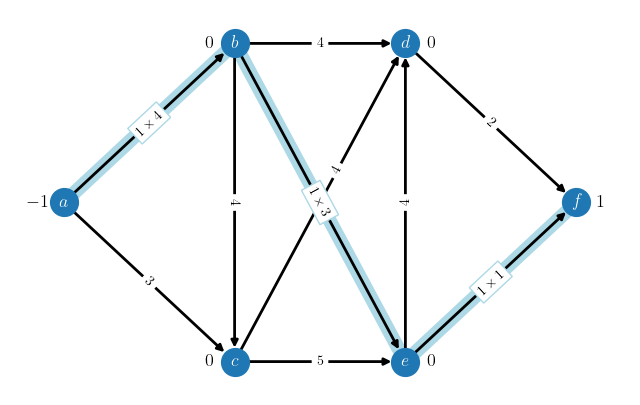

In [77]:
qnx.Draw( G, pos, functions, figsize=(8,5) )

In [94]:
def Fig13(n,m):
    G = nx.DiGraph()
    I = list(range(1,n+1))
    J = list(range(1,m+1))
    for i in I:
        G.add_node(f's{i}', label=f'$s_{i}$',layer=1)    
    for j in J:
        G.add_node(f'd{j}', label=f'$d_{j}$',layer=2)
    for i in I:
        for j in J:
            G.add_edge(f's{i}',f'd{j}', label=f'$c_{{{i}{j}}}$')
    return G

In [95]:
G = Fig13(2,3)
pos = nx.multipartite_layout(G,subset_key='layer')

In [98]:
node_size = 800
functions = [ ( nx.draw_networkx_nodes, { 'node_size' : node_size } )
             ,( nx.draw_networkx_edges, dict(node_size=node_size) )
             ,( nx.draw_networkx_edge_labels, dict( rotate=True, label_pos=.35, font_size=12, edge_labels=nx.get_edge_attributes( G, 'label' ) ) )
             ,( nx.draw_networkx_labels, { 'font_color' : 'white', 'font_size' : 13, 'labels' : nx.get_node_attributes( G, 'label' ) } ) 
             ]

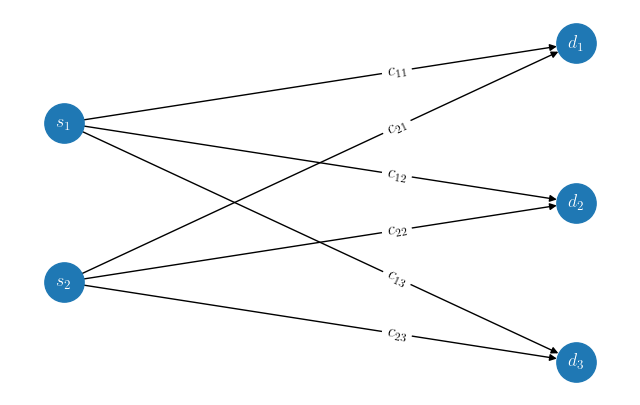

In [99]:
qnx.Draw( G, pos, functions, figsize=(8,5) )

In [111]:
def Fig16():
    nodes = '''
node,nudge,demand,layer
a,'w',-1,1
b,'w',-1,1
c,'e',1,2
d,'e',1,2
'''

    edges = '''
from,to,cost
a,c,3
a,d,4
b,c,1
b,d,3
'''
    nodes = pd.read_csv(StringIO(nodes), sep=',', index_col='node').fillna(0)
    edges = pd.read_csv(StringIO(edges), sep=',', index_col=['from','to'])

    return  nodes, edges

In [112]:
G = qnx.FillGraphFromFrames( nx.DiGraph(), *Fig16() )
pos = nx.multipartite_layout(G,subset_key='layer')

In [113]:
flow = nx.min_cost_flow(G,demand='demand',capacity='capacity',weight='cost')
F = { (u,v) : flow[u][v] for (u,v) in G.edges() if flow[u][v] }
node_size = 400
nudge = nx.get_node_attributes(G,'nudge')
edge_labels_with_flow = { (u,v) : rf'${flow[u][v]}\times{l}$' for (u,v),l in nx.get_edge_attributes(G,'cost').items() if flow[u][v] }
edge_labels_without_flow = { (u,v) : rf'${l}$' for (u,v),l in nx.get_edge_attributes(G,'cost').items() if flow[u][v] == 0 }
nudged = { n : qnx.Nudge(p,nudge[n],.15) for n,p in pos.items() }
functions = [ ( nx.draw_networkx_nodes, dict( node_size=node_size ) )
             ,( nx.draw_networkx_labels, dict( font_color='white', font_size=13, labels={ n : f'${n}$' for n in G.nodes} ) ) 
             ,( nx.draw_networkx_labels, dict( pos=nudged, font_color='black', font_size=13, labels={ n : f'${d}$' for n,d in nx.get_node_attributes(G,'demand').items() } ) ) 
             ,( nx.draw_networkx_edges, dict( edgelist=F.keys(), width=10, edge_color='lightblue', style='solid', alpha=None, arrowstyle='-', node_size=node_size) )
             ,( nx.draw_networkx_edges, dict( node_size=node_size, width=2 ) )
             ,( nx.draw_networkx_edge_labels, dict(edge_labels=edge_labels_with_flow, label_pos=.35, rotate=True, bbox=dict(boxstyle='square', facecolor='white', alpha=None, edgecolor='lightblue') ) )
             ,( nx.draw_networkx_edge_labels, dict(edge_labels=edge_labels_without_flow, rotate=True ) )
             ]

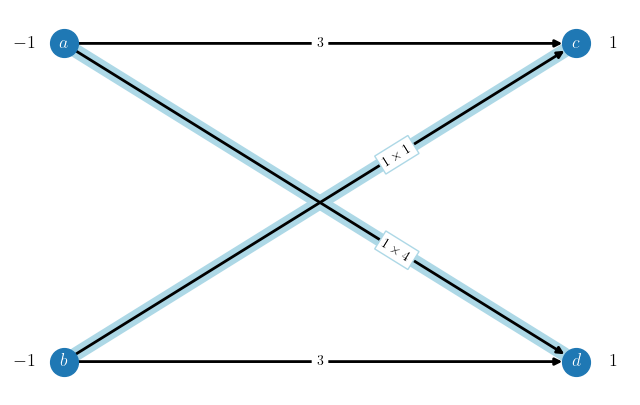

In [114]:
qnx.Draw( G, pos, functions, figsize=(8,5) )

In [150]:
def Fig18():
    nodes = '''
node,layer
s,0
a,1
b,1
c,2
d,2
e,2
t,3
'''

    edges = '''
from,to,capacity
s,a,1
s,b,1
a,c,1
a,d,1
a,e,1
b,e,1
c,t,1
d,t,1
e,t,1
'''
    nodes = pd.read_csv(StringIO(nodes), sep=',', index_col='node').fillna(0)
    edges = pd.read_csv(StringIO(edges), sep=',', index_col=['from','to'])

    return  nodes, edges

In [151]:
G = qnx.FillGraphFromFrames( nx.DiGraph(), *Fig18() )
pos = nx.multipartite_layout(G,subset_key='layer')

In [152]:
flow = nx.maximum_flow(G,'s','t')
F = { (u,v) : 8*flow[-1][u][v] for (u,v) in G.edges() }

node_size = 800
all_edge_labels = nx.get_edge_attributes(G,'capacity')
edges_with_rotated_labels = { (u,v) for (u,v) in G.edges if u == 's' or v == 't' }
rotated_edge_labels = { e : l for e,l in all_edge_labels.items() if e in edges_with_rotated_labels }
vertical_edge_labels = { e : l for e,l in all_edge_labels.items() if not e in edges_with_rotated_labels }
functions = [ ( nx.draw_networkx_nodes, { 'node_size' : node_size } )
             ,( nx.draw_networkx_edges, dict( width=list(F.values() ), edge_color='lightblue', style='solid', alpha=None, arrowstyle='-', node_size=node_size) )
             ,( nx.draw_networkx_edges, dict( node_size=node_size, width=.2 ) )
             ,( nx.draw_networkx_edge_labels, { 'bbox' : dict(boxstyle='round4', facecolor='white', alpha=None, edgecolor='red'), 'edge_labels' : rotated_edge_labels, 'rotate' : True } )
             ,( nx.draw_networkx_edge_labels, dict( bbox=dict(boxstyle='circle', facecolor='white', alpha=None, edgecolor='orange'), edge_labels=vertical_edge_labels, rotate=False ) )
             ,( nx.draw_networkx_edge_labels, dict( edge_labels=f, rotate=True, label_pos=.85, font_size=6 ) )
             ,( nx.draw_networkx_labels, { 'font_color' : 'white', 'font_size' : 13, 'labels' : { n : f'${n}$' for n in G.nodes } } ) 
             ]

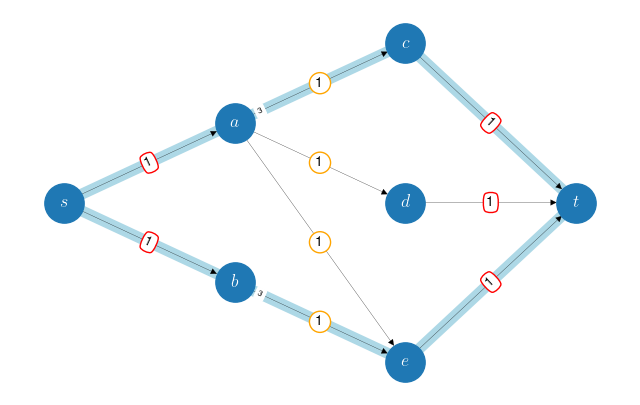

In [153]:
qnx.Draw( G, pos, functions, figsize=(8,5) )

In [172]:
def Fig19():
    nodes = '''
node,layer
a,1
b,2
c,2
d,3
e,3
f,4
'''

    edges = '''
from,to
a,b
a,c
b,c
b,d
c,e
d,e
d,f
'''
    nodes = pd.read_csv(StringIO(nodes), sep=',', index_col='node')
    edges = pd.read_csv(StringIO(edges), sep=',', index_col=['from','to'])

    return  nodes, edges

In [173]:
G = qnx.FillGraphFromFrames( nx.Graph(), *Fig19() )
pos = nx.multipartite_layout(G,subset_key='layer')

In [174]:
M = nx.maximal_matching(G)

In [175]:
node_size = 800
functions = [ ( nx.draw_networkx_nodes, { 'node_size' : node_size } )
             ,( nx.draw_networkx_edges, dict( edgelist=M, width=8, edge_color='lightblue', style='solid', alpha=None, arrowstyle='-', node_size=node_size) )
             ,( nx.draw_networkx_edges, dict( node_size=node_size, width=.2 ) )
             ,( nx.draw_networkx_labels, { 'font_color' : 'white', 'font_size' : 13, 'labels' : { n : f'${n}$' for n in G.nodes } } ) 
             ]

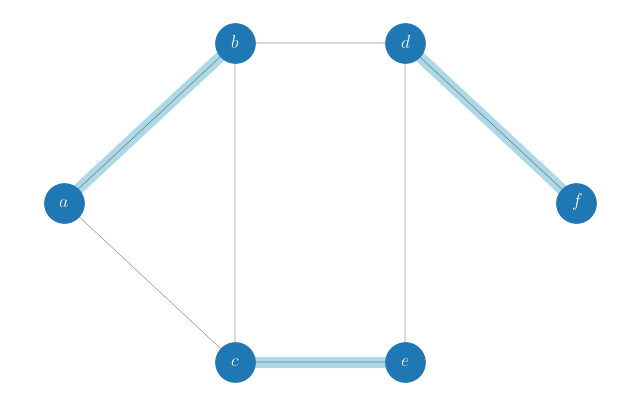

In [176]:
qnx.Draw( G, pos, functions, figsize=(8,5) )